# No-Show Appointments Data Set Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os 
os.chdir("E:\\Learning Videos\\EGFWD Professional\\Project2")

## Read Data

In [2]:
mdf=pd.read_csv("./noshowappointments-kagglev2-may-2016.csv")


## Check data

In [3]:
mdf.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
mdf.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

## Convert Columns' names to lower case 

In [5]:
mdf=mdf.rename(axis='columns',mapper=lambda x:x.lower())
mdf.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no-show'],
      dtype='object')

## Check unique values for columns

In [6]:
mdf['scholarship'].nunique()

2

In [7]:
mdf['diabetes'].nunique()

2

In [8]:
mdf['hipertension'].nunique()

2

In [9]:
mdf['gender'].nunique()

2

In [10]:
mdf['alcoholism'].nunique()

2

In [11]:
mdf['sms_received'].nunique()

2

In [12]:
mdf['handcap'].nunique()

5

In [13]:
mdf['appointmentday']

0         2016-04-29T00:00:00Z
1         2016-04-29T00:00:00Z
2         2016-04-29T00:00:00Z
3         2016-04-29T00:00:00Z
4         2016-04-29T00:00:00Z
                  ...         
110522    2016-06-07T00:00:00Z
110523    2016-06-07T00:00:00Z
110524    2016-06-07T00:00:00Z
110525    2016-06-07T00:00:00Z
110526    2016-06-07T00:00:00Z
Name: appointmentday, Length: 110527, dtype: object

## Convert data types  
In this phase will convert datatypes for some columns :  
1. handcap to boolean  
2. scholarship to boolean.   
3. hipertension to boolean.    
4. alcoholism to boolean.  
5. sms_received to boolean.   
6. diabetes to boolean.  
7. handcap to boolean.  
8. scheduledday to datetime .
9. appointmentday to datetime.  


In [14]:
mdf['scheduledday']=pd.to_datetime(mdf['scheduledday'])
mdf['appointmentday']=pd.to_datetime(mdf['appointmentday'])
mdf['sms_received']=mdf['sms_received'].astype(bool)
mdf['scholarship']=mdf['scholarship'].astype(bool)
mdf['handcap']=mdf['handcap'].astype(bool)
mdf['diabetes']=mdf['diabetes'].astype(bool)
mdf['alcoholism']=mdf['alcoholism'].astype(bool)
mdf['hipertension']=mdf['hipertension'].astype(bool)

In [15]:
mdf.dtypes

patientid                     float64
appointmentid                   int64
gender                         object
scheduledday      datetime64[ns, UTC]
appointmentday    datetime64[ns, UTC]
age                             int64
neighbourhood                  object
scholarship                      bool
hipertension                     bool
diabetes                         bool
alcoholism                       bool
handcap                          bool
sms_received                     bool
no-show                        object
dtype: object

## Extract the week day name & Hour & Hour & Month name from scheduledday column

In [16]:
mdf['hour']=mdf['scheduledday'].dt.hour
mdf['month']=mdf['scheduledday'].dt.month_name()
mdf['week_day']=mdf['scheduledday'].dt.day_name()

## Analysis Phase :
This phase will be divied to two phases the first phase will answer some public questions related to the whole dataset.  
1. what is the common neighbourhood in the dataset ?  
2. what is the common month in the dataset?  
3. what is the common weekday in the dataset?  
4. what is the common gender in the dataset?
5. was it common to receive sms in the dataset or not ?
6. was it comon to make no-show appointments ?
The second phase the dataset will be divided to small groups and some questions will be answered to each group.
- The first dataset is derived from the main dataset based on scholarship.  
- The second dataset is derived from the main dataset based on hipertension.  
- The third dataset is derived from the main dataset based on diabetes. 
- The fourth dataset is derived from the main dataset based on alcoholism.  
- The fifth dataset is derived from the main dataset based on alcoholism & Handcap & Schloarship 
for each each dataset we will answer the following questions:  
1- What is the common gender for the group ?  
2- what is the common day for the group?   
3- what is the common hour for the group in schedulededday column?  
4- what is the common neighbourhood for the group?   
5- was it common to receive SMS for the group?  
6- what is the gender distribution for the group?   
7- what is the receving SMS distribution for the group?    
Each group is divided into show appointment / no-show appointment and each group get the above questions answered.


In [127]:
def get_female(df):
    female_df=DateFrame(df[df['gender']=='F'])
    return female_df
def get_common_month(df):
    common_month=df['month'].mode()[0]
    return common_month
def get_common_weekday(df):
    common_weekday=df['week_day'].mode()[0]
    return common_weekday
def get_male(df):
    male_df=DateFrame(df[df['gender']=='F'])
    return male_df
def get_common_neighbourhood(df):
    common_neighbourhood=df['neighbourhood'].mode()[0]
    return common_neighbourhood
def get_no_show(df):
    no_showdf=pd.DataFrame(df[df['no-show']=='Yes'])
    return no_showdf
def get_show(df):
    showdf=pd.DataFrame(df[df['no-show']=='No'])
    return showdf
def is_it_common_to_receive_sms(df):
    is_receving_sms=df['sms_received'].mode()[0]
    return is_receving_sms
def get_common_gender(df):
    common_gender=df['gender'].mode()[0]
    if common_gender=='F':
        return "Female"
    else:
        return "Male"
def is_common_noshow(df):
    is_common_noshowAppointment=df['no-show'].mode()[0]
    return is_common_noshowAppointment
def get_gender_distribution(df):
    gender_distribution=pd.DataFrame(df['gender'].value_counts())
    return gender_distribution
def get_sms_distribution(df):
    sms_distribution=pd.DataFrame(df['sms_received'].value_counts())
    return sms_distribution
def get_common_hour(df):
    common_hour=df['hour'].mode()[0]
    return common_hour
def get_neighbourhood_distribution(df,group):
    neighbourhood_distribution=pd.DataFrame(df['neighbourhood'].value_counts())
    neighbourhood_distribution=neighbourhood_distribution.head(10)
    title="Top 10 Neighbourhood Distribution "+str(group)+"Patient"
    plot_fig=neighbourhood_distribution.plot(kind='bar',ylabel="Number of Patients",xlabel='Neighbourhood',title=title)
    return plot_fig

### General Analysis

##### What is the common neighbourhood in the dataset ?

In [18]:
mdf['neighbourhood'].mode()[0]

'JARDIM CAMBURI'

##### What is the common gender in the dataset ?


In [19]:
get_common_gender(mdf)

'Female'

##### What is the common month in the dataset ?

In [20]:
get_common_month(mdf)

'May'

##### What is the common day in the dataset ?

In [21]:
get_common_weekday(mdf)

'Tuesday'

##### was it is the common to receive_sms in the dataset ?

In [22]:
is_it_common_to_receive_sms(mdf)

False

array([<AxesSubplot:ylabel='no-show'>], dtype=object)

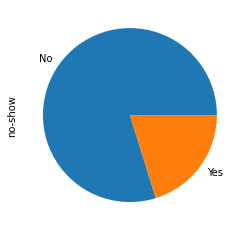

In [23]:
mdf['no-show'].value_counts().plot(kind='pie',subplots='True')

From the above figure it isn't common to make no-show appoointments.

#### Scholarship Group:

In [24]:
scholarshipdf=mdf[mdf['scholarship']==True]
scholarshipdf.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show,hour,month,week_day
12,5.666548e+14,5634718,F,2016-04-28 11:33:51+00:00,2016-04-29 00:00:00+00:00,22,NOVA PALESTINA,True,False,False,False,False,False,No,11,April,Thursday
17,1.479497e+13,5633460,F,2016-04-28 09:28:57+00:00,2016-04-29 00:00:00+00:00,40,CONQUISTA,True,False,False,False,False,False,Yes,9,April,Thursday
18,1.713538e+13,5621836,F,2016-04-26 10:54:18+00:00,2016-04-29 00:00:00+00:00,30,NOVA PALESTINA,True,False,False,False,False,True,No,10,April,Tuesday
31,3.112849e+11,5628907,M,2016-04-27 12:07:14+00:00,2016-04-29 00:00:00+00:00,12,NOVA PALESTINA,True,False,False,False,False,False,Yes,12,April,Wednesday
33,7.653517e+12,5616921,F,2016-04-25 15:01:04+00:00,2016-04-29 00:00:00+00:00,38,SÃO CRISTÓVÃO,True,False,False,False,False,True,No,15,April,Monday


##### What is the common weekday for scholarship group?

In [25]:
get_common_weekday(scholarshipdf)

'Tuesday'

##### What is the common Month for scholarship group?

In [26]:
get_common_month(scholarshipdf)

'May'

##### What is the common Neighbourhood for scholarship group?

In [27]:
get_common_neighbourhood(scholarshipdf)

'ILHA DO PRÍNCIPE'

##### What is the common gender for scholarship group?

In [28]:
get_common_gender(scholarshipdf)

'Female'

##### was it common to receive SMS for Scholarship group ?

In [29]:
is_it_common_to_receive_sms(scholarshipdf)

False

#### What is the gender distribution for scholarship group ?

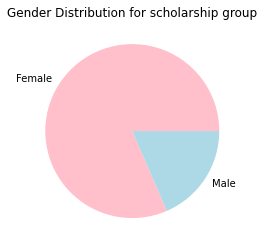

In [30]:
scholarship_gender_distribution=get_gender_distribution(scholarshipdf)
plt.title('Gender Distribution for scholarship group')
plt.pie(scholarship_gender_distribution['gender'],labels=['Female','Male'],colors=['pink','lightblue'])
plt.show()

#### What is the SMS distribution for Scholarship Group ?

In [31]:
sms_scholarship_distribution=get_sms_distribution(scholarshipdf)
sms_scholarship_distribution.head()

,sms_received
False,7356
True,3505


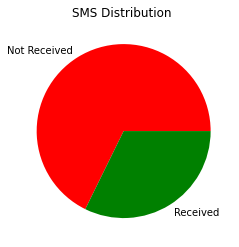

In [32]:
plt.title("SMS Distribution ")
plt.pie(sms_scholarship_distribution['sms_received'],labels=['Not Received','Received'],colors=['red','green'])
plt.show()

#### Which scholarship gender make show appointment more ?

In [33]:
schloarship_showdf=scholarshipdf[scholarshipdf['no-show']=='No']
get_common_gender(schloarship_showdf)

'Female'

#### which neighbourhood that has show appointment for schlorship Patient?

In [34]:
get_common_neighbourhood(schloarship_showdf)

'ILHA DO PRÍNCIPE'

#### which month that has show appointment for scholarship Patient ?

In [35]:
get_common_month(schloarship_showdf)

'May'

#### which common_day for show appointment for scholarship Patient ?

In [36]:
get_common_weekday(schloarship_showdf)

'Tuesday'

#### which gender distribution for show appointment for scholarship Patient?

In [37]:
show_scholarship_gender_df=get_gender_distribution(schloarship_showdf)

([<matplotlib.patches.Wedge at 0x2c4004c0310>,
 [Text(-0.918552292592614, 0.6051955764650409, 'Female'),
  Text(0.9185522925926142, -0.6051955764650405, 'Male')])

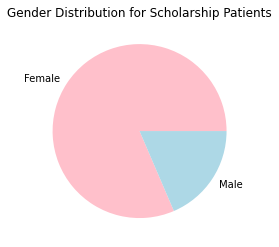

In [38]:
plt.title("Gender Distribution for Scholarship Patients")
plt.pie(show_scholarship_gender_df['gender'],labels=['Female','Male'],colors=['pink','lightblue'])

In [39]:
show_scholarship_df.head()

NameError: name 'show_scholarship_df' is not defined

#### which hour is common for show schlarship Patient ? 

In [40]:
get_common_hour(schloarship_showdf)

7

#### No SHow appointment for Scholarship patient

In [41]:
no_show_scholarship_df=scholarshipdf[scholarshipdf['no-show']=='Yes']

#### Which gender is common to make no-show appointment for scholarship group ?

In [42]:
get_common_gender(no_show_scholarship_df)

'Female'

#### Which neighbourhood is common to make no-show appointment for scholarship group?

In [43]:
get_common_neighbourhood(no_show_scholarship_df)

'ILHA DO PRÍNCIPE'

In [44]:
scholarship_no_show_sms=get_sms_distribution(no_show_scholarship_df)
scholarship_no_show_sms.head()

,sms_received
False,1394
True,1184


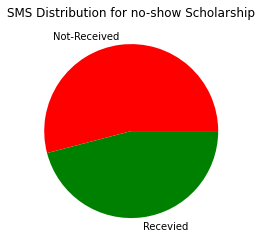

In [45]:
plt.title("SMS Distribution for no-show Scholarship")
plt.pie(scholarship_no_show_sms['sms_received'],labels=['Not-Received','Recevied'],colors=['red','green'])
plt.show()

#### what is the common day for no-show appointment for scholarship group?

In [46]:
get_common_weekday(no_show_scholarship_df)

'Tuesday'

#### what is the common month for no-show appointment for scholarship group?

In [47]:
get_common_month(no_show_scholarship_df)

'May'

#### Top 10 Neighbourhood for Scholarship

<AxesSubplot:title={'center':'Common Scholarship Neighbourhood'}, xlabel='Neighbourhood', ylabel='Number of Patients'>

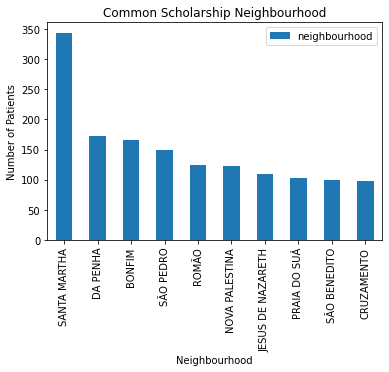

In [73]:
neighbourhood_schlorship_distribution=get_neighbourhood_distribution(scholarshipdf)
neighbourhood_distribution.plot(kind='bar',ylabel='Number of Patients',xlabel='Neighbourhood',title='Common Scholarship Neighbourhood')

## Alcoholism

In [49]:
alcoholism_df=mdf[mdf['alcoholism']==True]
alcoholism_df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show,hour,month,week_day
46,1.379437e+11,5615608,M,2016-04-25 12:44:36+00:00,2016-04-29 00:00:00+00:00,58,SÃO CRISTÓVÃO,False,True,False,True,False,True,No,12,April,Monday
131,4.755938e+13,5637150,M,2016-04-28 17:38:06+00:00,2016-04-29 00:00:00+00:00,29,PRAIA DO SUÁ,False,False,False,True,False,False,Yes,17,April,Thursday
133,3.587186e+12,5580520,M,2016-04-14 07:07:10+00:00,2016-04-29 00:00:00+00:00,69,PRAIA DO SUÁ,False,False,True,True,False,False,No,7,April,Thursday
186,7.329661e+13,5587737,M,2016-04-15 09:02:16+00:00,2016-04-29 00:00:00+00:00,66,REDENÇÃO,False,True,False,True,False,False,No,9,April,Friday
207,6.359796e+13,5642700,M,2016-04-29 16:49:22+00:00,2016-04-29 00:00:00+00:00,46,MARUÍPE,False,False,False,True,False,False,No,16,April,Friday


In [ ]:
### what is the common Gender

In [50]:
get_common_gender(alcoholism_df)

'Male'

([<matplotlib.patches.Wedge at 0x2c402fdaee0>,
 [Text(-0.4558505608072935, 1.0010995286242403, 'Male'),
  Text(0.45585056080729336, -1.0010995286242403, 'Female')])

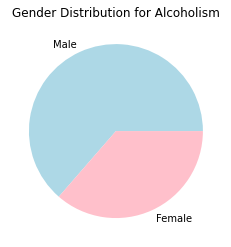

In [56]:
gender_distribution_alcoholism=get_gender_distribution(alcoholism_df)
plt.title("Gender Distribution for Alcoholism")
plt.pie(gender_distribution_alcoholism['gender'],colors=['lightblue','pink'],labels=['Male','Female'])

In [ ]:
####

In [57]:
sms_alcoholism_distribtuion=get_sms_distribution(alcoholism_df)

,sms_received
False,2513
True,847


([<matplotlib.patches.Wedge at 0x2c40322a130>,
 [Text(-0.5814684804599021, 0.9337528614315742, 'No-Received'),
  Text(0.5814685678841521, -0.9337528069905617, 'Received')])

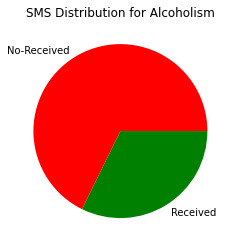

In [59]:
plt.title("SMS Distribution for Alcoholism")
plt.pie(sms_scholarship_distribution['sms_received'],colors=['red','green'],labels=['No-Received','Received'])

In [60]:
get_common_month(alcoholism_df)

'May'

In [61]:
get_common_weekday(alcoholism_df)

'Tuesday'

In [62]:
get_common_hour(alcoholism_df)

7

In [63]:
get_common_neighbourhood(alcoholism_df)

'SANTA MARTHA'

<AxesSubplot:title={'center':'Top 10 Alcoholism Neighbourhood'}, xlabel='Neighbourhood', ylabel='Number of Patients'>

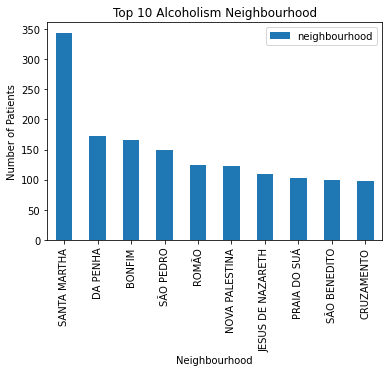

In [71]:
neighbourhood_distribution=get_neighbourhood_distribution(alcoholism_df)
neighbourhood_distribution.plot(kind='bar',xlabel='Neighbourhood',ylabel='Number of Patients',title="Top 10 Alcoholism Neighbourhood")

In [77]:
show_alcoholism_df=get_show(alcoholism_df)

In [78]:
get_common_neighbourhood(show_alcoholism_df)

'SANTA MARTHA'

In [79]:
get_common_weekday(show_alcoholism_df)

'Wednesday'

In [80]:
get_common_month(show_alcoholism_df)

'May'

In [81]:
get_common_hour(show_alcoholism_df)

7

In [84]:
show_gender_distribtuion_alcoholism=get_gender_distribution(show_alcoholism_df)
show_gender_distribtuion_alcoholism

,gender
M,1768
F,915


([<matplotlib.patches.Wedge at 0x2c40315a430>,
 [Text(-0.5267884955401272, 0.9656572274707882, 'Male'),
  Text(0.5267884955401275, -0.9656572274707881, 'Female')])

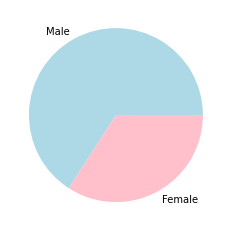

In [86]:
plt.pie(show_gender_distribtuion_alcoholism['gender'],labels=['Male','Female'],colors=['lightblue','pink'])

<AxesSubplot:title={'center':'Top 10 Neighbourhood Show Distribution Alcoholism '}, xlabel='Neighbourhood', ylabel='Number of Patients'>

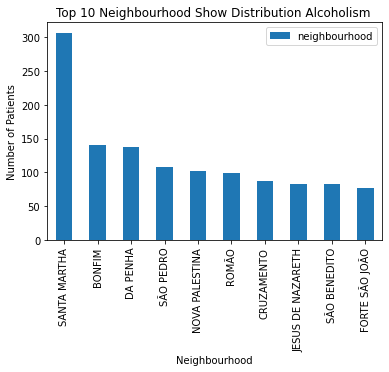

In [89]:
neighbourhood_distribution_show_alcoholism=get_neighbourhood_distribution(show_alcoholism_df)
neighbourhood_distribution_show_alcoholism.plot(kind='bar',title='Top 10 Neighbourhood Show Distribution Alcoholism ',xlabel="Neighbourhood",ylabel='Number of Patients')

In [103]:
show_sms_distribution_alcoholism=get_sms_distribution(show_alcoholism_df)
show_sms_distribution_alcoholism

,sms_received
False,2113
True,570


In [ ]:
### No Show Alocoholism 

In [90]:

alocholism_no_show=get_no_show(alcoholism_df)

In [91]:
get_common_gender(alocholism_no_show)

'Male'

In [92]:
get_common_month(alocholism_no_show)

'May'

In [93]:
get_common_weekday(alocholism_no_show)

'Tuesday'

In [94]:
get_common_hour(alocholism_no_show)

7

In [97]:
gender_distribution_no_show_alcoholism=get_gender_distribution(alocholism_no_show)
gender_distribution_no_show_alcoholism

,gender
M,369
F,308


([<matplotlib.patches.Wedge at 0x2c4034341c0>,
 [Text(-0.15516821224994487, 1.0890008383408878, 'Male'),
  Text(0.1551682122499445, -1.0890008383408878, 'Femal')])

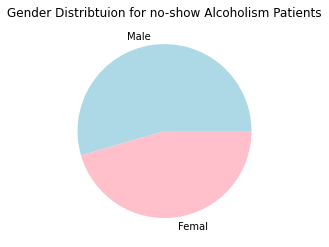

In [99]:
plt.title("Gender Distribtuion for no-show Alcoholism Patients")
plt.pie(gender_distribution_no_show_alcoholism['gender'],labels=['Male','Femal'],colors=['lightblue','pink'])

In [101]:
sms_distribution_for_no_show_alcoholism=get_sms_distribution(alocholism_no_show)
sms_distribution_for_no_show_alcoholism

,sms_received
False,400
True,277


In [ ]:
### Handcap Patient

In [104]:
handcap_df=mdf[mdf['handcap']==True]

In [105]:
get_common_gender(handcap_df)

'Female'

In [106]:
get_common_neighbourhood(handcap_df)

'SANTA MARTHA'

In [107]:
get_common_month(handcap_df)

'May'

In [108]:
get_common_hour(handcap_df)

9

In [109]:
get_common_weekday(handcap_df)

'Tuesday'

<AxesSubplot:title={'center':'Top 10 handcap Neighbourhood'}, xlabel='Neighbourhood', ylabel='Number of Patient'>

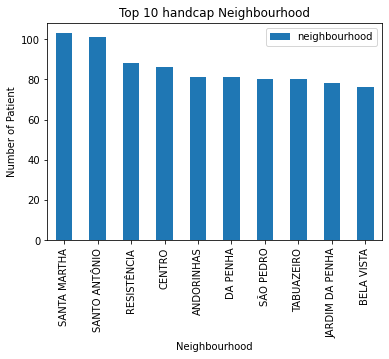

In [112]:
neighbourhood_distribution_handcap=get_neighbourhood_distribution(handcap_df)
neighbourhood_distribution_handcap.plot(kind='bar',ylabel="Number of Patient",title="Top 10 handcap Neighbourhood",xlabel="Neighbourhood")

In [113]:
get_sms_distribution(handcap_df)

,sms_received
False,1705
True,536


In [114]:
handcap_show_df=get_show(handcap_df)

In [115]:
get_common_hour(handcap_show_df)

9

In [116]:
get_common_month(handcap_show_df)

'May'

In [117]:
get_common_hour(handcap_show_df)

9

In [118]:
get_common_weekday(handcap_show_df)

'Tuesday'

<AxesSubplot:title={'center':'Top 10 Neighbourhood Distribution Handcap show appointment Patient'}, xlabel='Neighbourhood', ylabel='Number of Patients'>

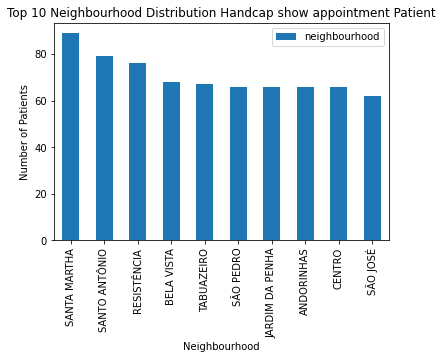

In [137]:
get_neighbourhood_distribution(handcap_show_df,"Handcap show appointment ")

In [ ]:
### No show handcap

In [129]:
no_show_handcap=get_no_show(handcap_df)

In [130]:
get_sms_distribution(no_show_handcap)

,sms_received
False,272
True,135


In [131]:
get_common_gender(no_show_handcap)

'Female'

In [132]:
get_common_weekday(no_show_handcap)

'Tuesday'

In [133]:
get_common_hour(no_show_handcap)

7

In [134]:
get_common_month(no_show_handcap)

'May'

<AxesSubplot:title={'center':'Top 10 Neighbourhood Distribution Handcap no show appointment Patient'}, xlabel='Neighbourhood', ylabel='Number of Patients'>

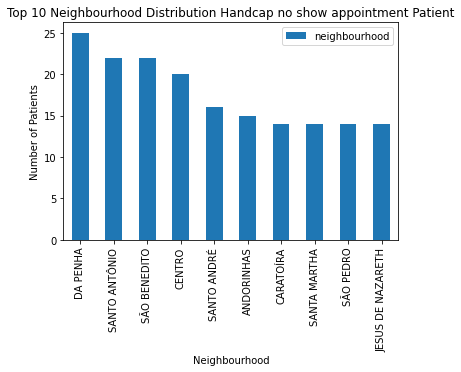

In [138]:
get_neighbourhood_distribution(no_show_handcap,"Handcap no show appointment ")

### Diabetes

In [136]:
diabetes_df=mdf[mdf['diabetes']==True]

In [141]:
get_common_gender(diabetes_df)

'Female'

In [139]:
get_common_weekday(diabetes_df)

'Tuesday'

In [140]:
get_common_month(diabetes_df)

'May'

In [142]:
get_sms_distribution(diabetes_df)

,sms_received
False,5587
True,2356


<AxesSubplot:title={'center':'Top 10 Neighbourhood Distribution Diabetes Patient'}, xlabel='Neighbourhood', ylabel='Number of Patients'>

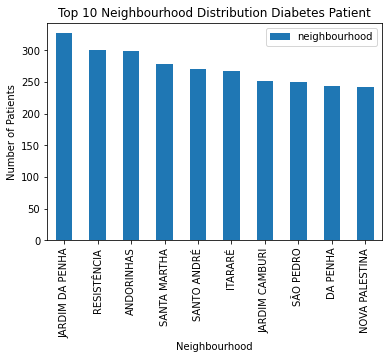

In [143]:
get_neighbourhood_distribution(diabetes_df,'Diabetes ')

In [144]:
get_gender_distribution(diabetes_df)

,gender
F,5606
M,2337


In [ ]:
### show diabetes

In [145]:
show_diabetes=get_show(diabetes_df)

In [146]:
get_common_gender(show_diabetes)

'Female'

In [147]:
get_common_weekday(show_diabetes)

'Tuesday'

In [148]:
get_common_month(show_diabetes)

'May'

In [149]:
get_common_hour(show_diabetes)

7

In [152]:
get_common_neighbourhood(show_diabetes)

'JARDIM DA PENHA'

<AxesSubplot:title={'center':'Top 10 Neighbourhood Distribution Show appointment diabetes Patient'}, xlabel='Neighbourhood', ylabel='Number of Patients'>

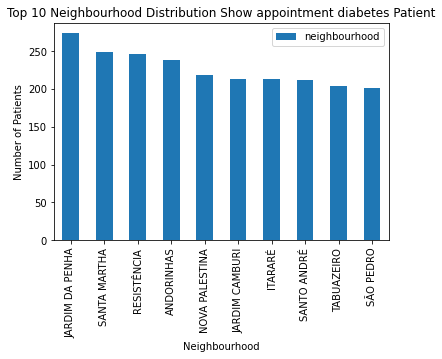

In [151]:
get_neighbourhood_distribution(show_diabetes,"Show appointment diabetes ")

In [ ]:
## No show diabetes

In [153]:
no_show_diabetes=get_no_show(diabetes_df)

In [154]:
get_sms_distribution(no_show_diabetes)

,sms_received
False,886
True,544


In [156]:
get_common_weekday(no_show_diabetes)

'Tuesday'

In [157]:
get_common_month(no_show_diabetes)

'May'

In [158]:
get_common_hour(no_show_diabetes)

7

In [159]:
get_gender_distribution(no_show_diabetes)

,gender
F,1017
M,413


In [160]:
get_sms_distribution(no_show_diabetes)

,sms_received
False,886
True,544


In [161]:
get_common_neighbourhood(no_show_diabetes)

'ANDORINHAS'

<AxesSubplot:title={'center':'Top 10 Neighbourhood Distribution No Show Appointment DiabetesPatient'}, xlabel='Neighbourhood', ylabel='Number of Patients'>

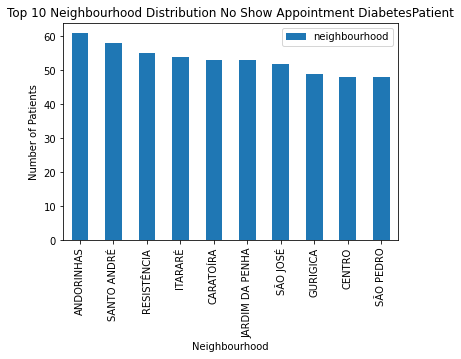

In [163]:
get_neighbourhood_distribution(no_show_diabetes,"No Show Appointment Diabetes")

In [ ]:
### Handcap & Scholarship & Diabetes

In [165]:
scholarship_hand_diabetes_df=mdf[mdf['diabetes']==True]
scholarship_hand_diabetes_df=scholarship_hand_diabetes_df[scholarship_hand_diabetes_df['scholarship']==True]
scholarship_hand_diabetes_df[scholarship_hand_diabetes_df['handcap']== True]

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show,hour,month,week_day
18024,1.576634e+13,5718741,F,2016-05-19 10:02:47+00:00,2016-05-25 00:00:00+00:00,57,ILHA DAS CAIEIRAS,True,True,True,False,True,False,Yes,10,May,Thursday
21385,2.494925e+14,5732601,F,2016-05-24 11:57:40+00:00,2016-05-30 00:00:00+00:00,54,JESUS DE NAZARETH,True,True,True,False,True,True,Yes,11,May,Tuesday
30121,5.988381e+12,5674732,F,2016-05-09 11:46:41+00:00,2016-05-11 00:00:00+00:00,42,MARUÍPE,True,True,True,False,True,False,No,11,May,Monday
56569,9.243818e+14,5647960,F,2016-05-02 14:46:09+00:00,2016-05-02 00:00:00+00:00,57,ILHA DO PRÍNCIPE,True,True,True,False,True,False,No,14,May,Monday
58295,5.992195e+12,5653807,F,2016-05-03 13:20:46+00:00,2016-05-03 00:00:00+00:00,42,REDENÇÃO,True,True,True,False,True,False,No,13,May,Tuesday
58304,5.992195e+12,5655139,F,2016-05-03 16:05:47+00:00,2016-05-10 00:00:00+00:00,42,REDENÇÃO,True,True,True,False,True,True,No,16,May,Tuesday
61098,9.312985e+09,5717143,F,2016-05-19 07:35:55+00:00,2016-05-19 00:00:00+00:00,73,SANTA MARTHA,True,True,True,False,True,False,No,7,May,Thursday
71728,5.992195e+12,5556271,F,2016-04-07 11:37:54+00:00,2016-05-06 00:00:00+00:00,42,REDENÇÃO,True,True,True,False,True,True,No,11,April,Thursday
74776,5.992195e+12,5682074,F,2016-05-10 15:42:43+00:00,2016-05-19 00:00:00+00:00,42,REDENÇÃO,True,True,True,False,True,False,No,15,May,Tuesday
85098,2.855232e+14,5781208,F,2016-06-07 09:10:25+00:00,2016-06-08 00:00:00+00:00,62,DA PENHA,True,True,True,False,True,False,No,9,June,Tuesday


In [166]:
get_common_gender(scholarship_hand_diabetes_df)

'Female'

In [167]:
get_common_neighbourhood(scholarship_hand_diabetes_df)

'NOVA PALESTINA'

<AxesSubplot:title={'center':'Top 10 Neighbourhood Distribution Handcap & Diabetes & Scholarship Patient Patient'}, xlabel='Neighbourhood', ylabel='Number of Patients'>

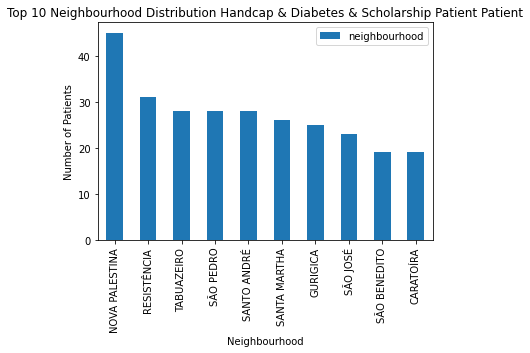

In [169]:
get_neighbourhood_distribution(scholarship_hand_diabetes_df,"Handcap & Diabetes & Scholarship Patient ")

In [170]:
get_sms_distribution(scholarship_hand_diabetes_df)

,sms_received
False,392
True,177


In [171]:
show_diabetes_hand_scholarship_df=get_show(scholarship_hand_diabetes_df)

In [172]:
get_common_gender(show_diabetes_hand_scholarship_df)

'Female'

In [173]:
get_common_hour(show_diabetes_hand_scholarship_df)

7

In [174]:
get_common_weekday(show_diabetes_hand_scholarship_df)

'Tuesday'

In [175]:
get_common_neighbourhood(show_diabetes_hand_scholarship_df)

'NOVA PALESTINA'

<AxesSubplot:title={'center':'Top 10 Neighbourhood Distribution Show Handcap & Scholarship & diabetes Patients Patient'}, xlabel='Neighbourhood', ylabel='Number of Patients'>

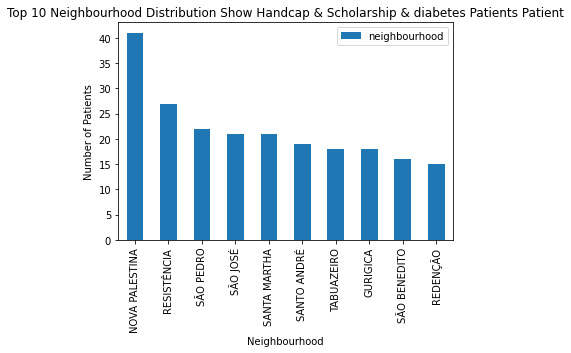

In [177]:
get_neighbourhood_distribution(show_diabetes_hand_scholarship_df,"Show Handcap & Scholarship & diabetes Patients ")

In [178]:
no_show_diabetes_hand_scholarship_df=get_no_show(scholarship_hand_diabetes_df)

In [181]:
get_common_gender(no_show_diabetes_hand_scholarship_df)

'Female'

In [180]:
get_gender_distribution(no_show_diabetes_hand_scholarship_df)

,gender
F,113
M,10


In [182]:
get_common_neighbourhood(no_show_diabetes_hand_scholarship_df)

'TABUAZEIRO'

<AxesSubplot:title={'center':'Top 10 Neighbourhood Distribution No Show appointment for handcap & diabetes & scholarship Patient Patient'}, xlabel='Neighbourhood', ylabel='Number of Patients'>

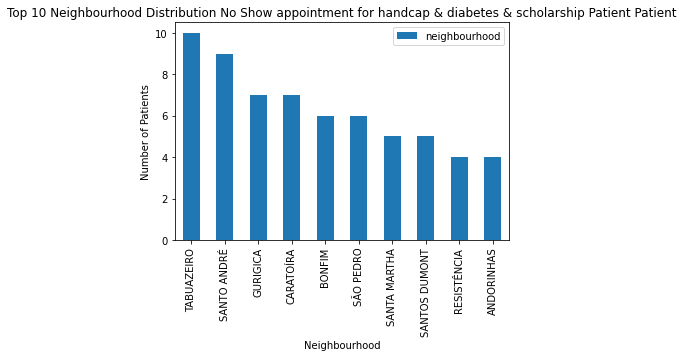

In [184]:
get_neighbourhood_distribution(no_show_diabetes_hand_scholarship_df,"No Show appointment for handcap & diabetes & scholarship Patient ")

### Hipertension Group 

In [185]:
hipertesion=mdf[mdf['hipertension']==True]

In [ ]:
get_common_gender(hipertesion)

In [186]:
get_common_hour(hipertesion)

7

In [187]:
get_common_neighbourhood(hipertesion)

'JARDIM DA PENHA'

In [189]:
get_common_weekday(hipertesion)

'Tuesday'

In [190]:
get_common_month(hipertesion)

'May'

In [191]:
get_gender_distribution(hipertesion)

,gender
F,15339
M,6462


In [192]:
get_sms_distribution(hipertesion)

,sms_received
False,14931
True,6870


### Show Hipertension

In [193]:
show_hipertension=get_show(hipertesion)

In [195]:
get_common_hour(show_hipertension)

7

In [197]:
get_common_weekday(show_hipertension)

'Tuesday'

In [198]:
get_common_month(show_hipertension)

'May'

In [199]:
get_common_gender(show_hipertension)

'Female'

In [200]:
get_gender_distribution(show_hipertension)

,gender
F,12682
M,5347


<AxesSubplot:title={'center':'Top 10 Neighbourhood Distribution Show Hipertnesion Appointment Patient'}, xlabel='Neighbourhood', ylabel='Number of Patients'>

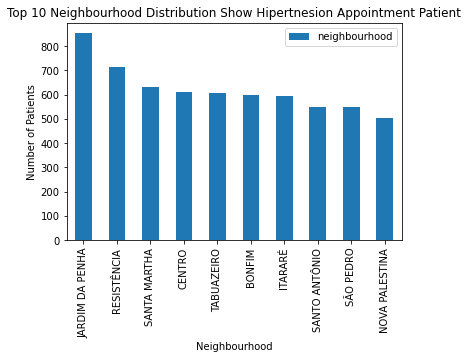

In [208]:
get_neighbourhood_distribution(show_hipertension,'Show Hipertnesion Appointment ')

### No SHow Hipertension 

In [201]:
no_show_hipertension=get_no_show(hipertesion)

In [202]:
get_common_hour(no_show_hipertension)

7

In [203]:
get_common_month(no_show_hipertension)

'May'

In [204]:
get_common_weekday(no_show_hipertension)

'Tuesday'

In [205]:
get_sms_distribution(no_show_hipertension)

,sms_received
False,2227
True,1545


In [206]:
get_gender_distribution(no_show_hipertension)

,gender
F,2657
M,1115


<AxesSubplot:title={'center':'Top 10 Neighbourhood Distribution No Show Hipertension Appointment Patient'}, xlabel='Neighbourhood', ylabel='Number of Patients'>

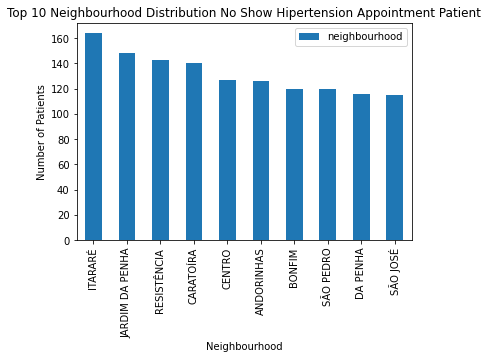

In [207]:
get_neighbourhood_distribution(no_show_hipertension,"No Show Hipertension Appointment ")